In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
confirmed_data = pd.read_csv("C:/Users/jmarshall/downloads/datasets_494724_1196190_time_series_covid_19_confirmed.csv")
death_data = pd.read_csv("C:/Users/jmarshall/downloads/datasets_494724_1196190_time_series_covid_19_deaths.csv")

In [3]:
confirmed_data.tail(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20
261,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,251,251,251,251,251,251,299,441,443,458
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,167,184,197,209,212,222,233,249,256,278
263,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,11,34,34,78,78,87,87,87,87,87
264,NaN,Tajikistan,38.861034,71.276093,0,0,0,0,0,0,...,1936,2140,2350,2551,2738,2929,3100,3266,3424,3563
265,NaN,Lesotho,-29.609988,28.233608,0,0,0,0,0,0,...,1,1,1,2,2,2,2,2,2,2


In [4]:
death_data.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,178,187,193,205,216,218,219,220,227,235
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,31,31,31,31,31,32,32,33,33,33
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,561,568,575,582,592,600,609,617,623,630
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,51
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,3,3,3,3,4,4,4,4,4,4


In [5]:
confirmed_data["Province/State"].unique()

array([nan, 'Australian Capital Territory', 'New South Wales',
       'Northern Territory', 'Queensland', 'South Australia', 'Tasmania',
       'Victoria', 'Western Australia', 'Alberta', 'British Columbia',
       'Grand Princess', 'Manitoba', 'New Brunswick',
       'Newfoundland and Labrador', 'Nova Scotia', 'Ontario',
       'Prince Edward Island', 'Quebec', 'Saskatchewan', 'Anhui',
       'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong', 'Guangxi',
       'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan', 'Hong Kong',
       'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu', 'Jiangxi', 'Jilin',
       'Liaoning', 'Macau', 'Ningxia', 'Qinghai', 'Shaanxi', 'Shandong',
       'Shanghai', 'Shanxi', 'Sichuan', 'Tianjin', 'Tibet', 'Xinjiang',
       'Yunnan', 'Zhejiang', 'Faroe Islands', 'Greenland',
       'French Guiana', 'French Polynesia', 'Guadeloupe', 'Mayotte',
       'New Caledonia', 'Reunion', 'Saint Barthelemy', 'St Martin',
       'Martinique', 'Aruba', 'Curacao', 'Sint

In [6]:
confirmed_data["Province/State"].fillna("", inplace=True)
death_data["Province/State"].fillna("", inplace=True)

In [7]:
confirmed_data.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20
0,,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,7653,8145,8676,9216,9998,10582,11173,11831,12456,13036
1,,Albania,41.1533,20.1683,0,0,0,0,0,0,...,949,964,969,981,989,998,1004,1029,1050,1076
2,,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,7377,7542,7728,7918,8113,8306,8503,8697,8857,8997
3,,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,761,762,762,762,762,762,763,763,763,763
4,,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,52,52,58,60,61,69,70,70,71,74


In [8]:
death_data.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20
0,,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,178,187,193,205,216,218,219,220,227,235
1,,Albania,41.1533,20.1683,0,0,0,0,0,0,...,31,31,31,31,31,32,32,33,33,33
2,,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,561,568,575,582,592,600,609,617,623,630
3,,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,51
4,,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,3,3,3,3,4,4,4,4,4,4


In [9]:
confirmed_data["Country - State"] = confirmed_data[["Country/Region", "Province/State"]].apply(lambda x: ' - '.join(x), axis=1)
death_data["Country - State"] = death_data[["Country/Region", "Province/State"]].apply(lambda x: ' - '.join(x), axis=1)

In [10]:
confirmed_data.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,Country - State
0,,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,8145,8676,9216,9998,10582,11173,11831,12456,13036,Afghanistan -
1,,Albania,41.1533,20.1683,0,0,0,0,0,0,...,964,969,981,989,998,1004,1029,1050,1076,Albania -
2,,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,7542,7728,7918,8113,8306,8503,8697,8857,8997,Algeria -
3,,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,762,762,762,762,762,763,763,763,763,Andorra -
4,,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,52,58,60,61,69,70,70,71,74,Angola -


In [11]:
death_data.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,Country - State
0,,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,187,193,205,216,218,219,220,227,235,Afghanistan -
1,,Albania,41.1533,20.1683,0,0,0,0,0,0,...,31,31,31,31,32,32,33,33,33,Albania -
2,,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,568,575,582,592,600,609,617,623,630,Algeria -
3,,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,Andorra -
4,,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,3,3,3,4,4,4,4,4,4,Angola -


In [12]:
death_data.drop(["Province/State", "Country/Region"], axis=1, inplace=True)

In [13]:
confirmed_data.drop(["Province/State", "Country/Region"], axis=1, inplace=True)

In [14]:
WuhanLat = 30.5928/(180/math.pi)
WuhanLong = 114.3055/(180/math.pi)
countriesLat = confirmed_data["Lat"]
countriesLong = confirmed_data["Long"]

In [15]:
type(countriesLat)

pandas.core.series.Series

In [16]:
countriesLat.dtype

dtype('float64')

In [17]:
confirmed_data["Distance"] = 3963.0*np.arccos((np.sin(WuhanLat)*np.sin(countriesLat)) + np.cos(WuhanLat)*np.cos(countriesLat)*np.cos(countriesLong-WuhanLong))

In [18]:
confirmed_data.tail(5)

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,Country - State,Distance
261,0.186360,6.613081,0,0,0,0,0,0,0,0,...,251,251,251,251,299,441,443,458,Sao Tome and Principe -,6167.071029
262,15.552727,48.516388,0,0,0,0,0,0,0,0,...,197,209,212,222,233,249,256,278,Yemen -,2683.356337
263,-11.645500,43.333300,0,0,0,0,0,0,0,0,...,34,78,78,87,87,87,87,87,Comoros -,6433.436756
264,38.861034,71.276093,0,0,0,0,0,0,0,0,...,2350,2551,2738,2929,3100,3266,3424,3563,Tajikistan -,2520.252167
265,-29.609988,28.233608,0,0,0,0,0,0,0,0,...,1,2,2,2,2,2,2,2,Lesotho -,4572.546700


In [18]:
def dist_from_Wuhan(long, lat):
    3963.0*np.arccos((np.sin(WuhanLat)*np.sin(lat)) + np.cos(WuhanLat)*np.cos(lat)*np.cos(long - WuhanLong))

death_data["Distance"] = dist_from_Wuhan(countriesLat, countriesLong)

In [19]:
death_data.dtypes

Lat                float64
Long               float64
1/22/20              int64
1/23/20              int64
1/24/20              int64
1/25/20              int64
1/26/20              int64
1/27/20              int64
1/28/20              int64
1/29/20              int64
1/30/20              int64
1/31/20              int64
2/1/20               int64
2/2/20               int64
2/3/20               int64
2/4/20               int64
2/5/20               int64
2/6/20               int64
2/7/20               int64
2/8/20               int64
2/9/20               int64
2/10/20              int64
2/11/20              int64
2/12/20              int64
2/13/20              int64
2/14/20              int64
2/15/20              int64
2/16/20              int64
2/17/20              int64
2/18/20              int64
                    ...   
5/1/20               int64
5/2/20               int64
5/3/20               int64
5/4/20               int64
5/5/20               int64
5/6/20               int64
5

In [20]:
test_series = death_data["Country - State"].astype('category')

In [21]:
test_series

0                                      Afghanistan - 
1                                          Albania - 
2                                          Algeria - 
3                                          Andorra - 
4                                           Angola - 
5                              Antigua and Barbuda - 
6                                        Argentina - 
7                                          Armenia - 
8            Australia - Australian Capital Territory
9                         Australia - New South Wales
10                     Australia - Northern Territory
11                             Australia - Queensland
12                        Australia - South Australia
13                               Australia - Tasmania
14                               Australia - Victoria
15                      Australia - Western Australia
16                                         Austria - 
17                                      Azerbaijan - 
18                          

In [22]:
death_data["Country - State"] = death_data["Country - State"].astype('category')

In [23]:
confirmed_data["Country - State"] = confirmed_data["Country - State"].astype('category')

In [24]:
death_data.index

RangeIndex(start=0, stop=266, step=1)

In [25]:
confirmed_data.index

RangeIndex(start=0, stop=266, step=1)

In [26]:
confirmed_data.iloc[0:5,0:5]

,Lat,Long,1/22/20,1/23/20,1/24/20
0,33.0000,65.0000,0,0,0
1,41.1533,20.1683,0,0,0
2,28.0339,1.6596,0,0,0
3,42.5063,1.5218,0,0,0
4,-11.2027,17.8739,0,0,0


In [27]:
test_df = confirmed_data
test_df.set_index("Country - State", inplace=True)
test_df.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,Distance
Country - State,,,,,,,,,,,,,,,,,,,,,
Afghanistan -,33.0000,65.0000,0,0,0,0,0,0,0,0,...,8145,8676,9216,9998,10582,11173,11831,12456,13036,4160.878100
Albania -,41.1533,20.1683,0,0,0,0,0,0,0,0,...,964,969,981,989,998,1004,1029,1050,1076,9869.276834
Algeria -,28.0339,1.6596,0,0,0,0,0,0,0,0,...,7542,7728,7918,8113,8306,8503,8697,8857,8997,9125.498645
Andorra -,42.5063,1.5218,0,0,0,0,0,0,0,0,...,762,762,762,762,762,763,763,763,763,8004.697489
Angola -,-11.2027,17.8739,0,0,0,0,0,0,0,0,...,52,58,60,61,69,70,70,71,74,4919.080767


In [28]:
test_df.index

CategoricalIndex(['Afghanistan - ', 'Albania - ', 'Algeria - ', 'Andorra - ',
                  'Angola - ', 'Antigua and Barbuda - ', 'Argentina - ',
                  'Armenia - ', 'Australia - Australian Capital Territory',
                  'Australia - New South Wales',
                  ...
                  'Malawi - ', 'United Kingdom - Falkland Islands (Malvinas)',
                  'France - Saint Pierre and Miquelon', 'South Sudan - ',
                  'Western Sahara - ', 'Sao Tome and Principe - ', 'Yemen - ',
                  'Comoros - ', 'Tajikistan - ', 'Lesotho - '],
                 categories=['Afghanistan - ', 'Albania - ', 'Algeria - ', 'Andorra - ', 'Angola - ', 'Antigua and Barbuda - ', 'Argentina - ', 'Armenia - ', ...], ordered=False, name='Country - State', dtype='category', length=266)

In [29]:
test_df.loc["Afghanistan - "]

Lat            33.0000
Long           65.0000
1/22/20         0.0000
1/23/20         0.0000
1/24/20         0.0000
1/25/20         0.0000
1/26/20         0.0000
1/27/20         0.0000
1/28/20         0.0000
1/29/20         0.0000
1/30/20         0.0000
1/31/20         0.0000
2/1/20          0.0000
2/2/20          0.0000
2/3/20          0.0000
2/4/20          0.0000
2/5/20          0.0000
2/6/20          0.0000
2/7/20          0.0000
2/8/20          0.0000
2/9/20          0.0000
2/10/20         0.0000
2/11/20         0.0000
2/12/20         0.0000
2/13/20         0.0000
2/14/20         0.0000
2/15/20         0.0000
2/16/20         0.0000
2/17/20         0.0000
2/18/20         0.0000
               ...    
4/30/20      2171.0000
5/1/20       2335.0000
5/2/20       2469.0000
5/3/20       2704.0000
5/4/20       2894.0000
5/5/20       3224.0000
5/6/20       3392.0000
5/7/20       3563.0000
5/8/20       3778.0000
5/9/20       4033.0000
5/10/20      4402.0000
5/11/20      4687.0000
5/12/20    

In [30]:
test_df.drop(['Lat', 'Long'], axis=1, inplace=True)

In [31]:
plain_df = test_df.drop(["Distance"], axis=1)

In [32]:
test_case = plain_df.loc['Afghanistan - ']

In [33]:
test_case.head()

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
1/26/20    0
Name: Afghanistan - , dtype: int64

In [34]:
test_case.shape

(128,)

In [35]:
test_case.index

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '5/19/20', '5/20/20', '5/21/20', '5/22/20', '5/23/20', '5/24/20',
       '5/25/20', '5/26/20', '5/27/20', '5/28/20'],
      dtype='object', length=128)

In [38]:
plain_df.index

CategoricalIndex(['Afghanistan - ', 'Albania - ', 'Algeria - ', 'Andorra - ',
                  'Angola - ', 'Antigua and Barbuda - ', 'Argentina - ',
                  'Armenia - ', 'Australia - Australian Capital Territory',
                  'Australia - New South Wales',
                  ...
                  'Malawi - ', 'United Kingdom - Falkland Islands (Malvinas)',
                  'France - Saint Pierre and Miquelon', 'South Sudan - ',
                  'Western Sahara - ', 'Sao Tome and Principe - ', 'Yemen - ',
                  'Comoros - ', 'Tajikistan - ', 'Lesotho - '],
                 categories=['Afghanistan - ', 'Albania - ', 'Algeria - ', 'Andorra - ', 'Angola - ', 'Antigua and Barbuda - ', 'Argentina - ', 'Armenia - ', ...], ordered=False, name='Country - State', dtype='category', length=266)

In [36]:
plain_df.loc["US - "]

1/22/20          1
1/23/20          1
1/24/20          2
1/25/20          2
1/26/20          5
1/27/20          5
1/28/20          5
1/29/20          5
1/30/20          5
1/31/20          7
2/1/20           8
2/2/20           8
2/3/20          11
2/4/20          11
2/5/20          11
2/6/20          11
2/7/20          11
2/8/20          11
2/9/20          11
2/10/20         11
2/11/20         12
2/12/20         12
2/13/20         13
2/14/20         13
2/15/20         13
2/16/20         13
2/17/20         13
2/18/20         13
2/19/20         13
2/20/20         13
            ...   
4/29/20    1039909
4/30/20    1069424
5/1/20     1103461
5/2/20     1132539
5/3/20     1158040
5/4/20     1180375
5/5/20     1204351
5/6/20     1229331
5/7/20     1257023
5/8/20     1283929
5/9/20     1309550
5/10/20    1329260
5/11/20    1347881
5/12/20    1369376
5/13/20    1390406
5/14/20    1417774
5/15/20    1442824
5/16/20    1467820
5/17/20    1486757
5/18/20    1508308
5/19/20    1528568
5/20/20    1

In [41]:
data = plain_df.loc["US - "]

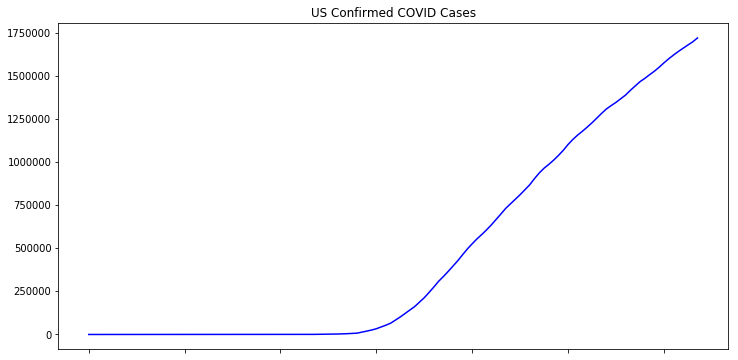

In [42]:
plt.figure(figsize=(12,6))
data.plot(title="US Confirmed COVID Cases", color = 'blue')
plt.show()

In [43]:
data.index

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '5/19/20', '5/20/20', '5/21/20', '5/22/20', '5/23/20', '5/24/20',
       '5/25/20', '5/26/20', '5/27/20', '5/28/20'],
      dtype='object', length=128)

In [44]:
data.index = pd.to_datetime(data.index)

In [45]:
weekly = data.resample("W").mean()

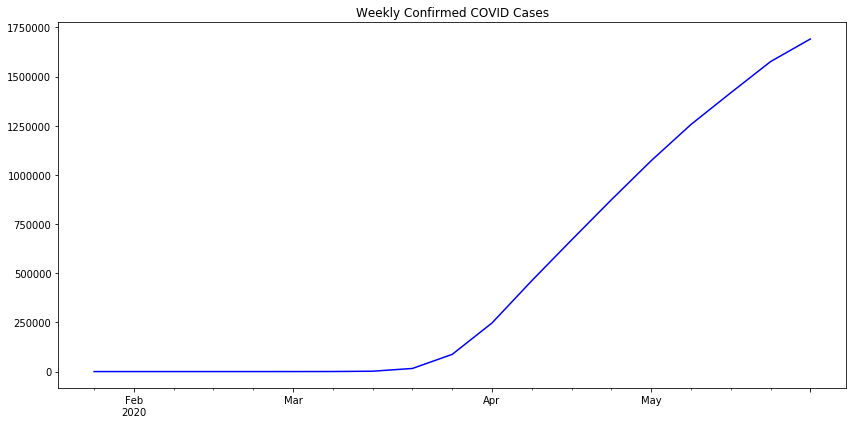

In [46]:
plt.figure(figsize=(12,6))
weekly.plot(title="Weekly Confirmed COVID Cases", color = 'blue')
plt.tight_layout()
plt.show()

In [47]:
weekly
type(weekly)
summary = data.describe()

In [48]:
summary = summary.transpose()
summary.head()

count       128.000000
mean     472810.125000
std      588694.078881
min           1.000000
25%          15.000000
Name: US - , dtype: float64

In [49]:
def create_training_series(complete_time_series, prediction_length):
    time_series_training = []
    observations = complete_time_series.shape[0]
    #complete_time_series = complete_time_series.tolist()
    for ts in range(1,int(observations/prediction_length)):
        time_series_training.append(complete_time_series.iloc[ts:ts-prediction_length])
        
    return time_series_training

In [69]:
prediction_length = 2

time_series_training = create_training_series(plain_df, prediction_length)

In [70]:
len(time_series_training)

132

In [71]:
def series_to_json_obj(ts):
    json_obj = {"start": str(ts.index[0]), "target": list(ts)}
    return json_obj

In [72]:
ts = time_series_training[0]
type(time_series_training)

list

                                                1/22/20  1/23/20  1/24/20  \
Country - State                                                             
Albania -                                             0        0        0   
Algeria -                                             0        0        0   
Andorra -                                             0        0        0   
Angola -                                              0        0        0   
Antigua and Barbuda -                                 0        0        0   
Argentina -                                           0        0        0   
Armenia -                                             0        0        0   
Australia - Australian Capital Territory              0        0        0   
Australia - New South Wales                           0        0        0   
Australia - Northern Territory                        0        0        0   
Australia - Queensland                                0        0        0   

<Figure size 864x432 with 0 Axes>

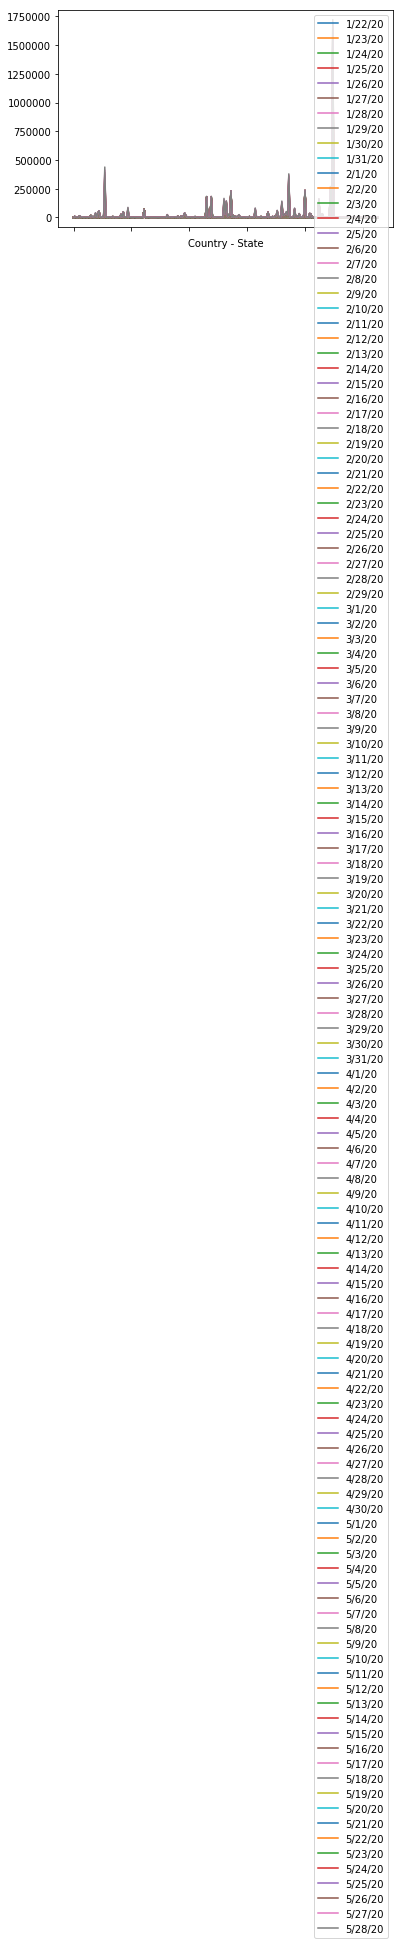

In [73]:
print(ts)
print(type(ts))
plt.figure(figsize=(12,6))
time_series_training[0].plot()
plt.show()

In [74]:
json_obj = series_to_json_obj(ts)

In [75]:
json_obj

{'start': 'Albania - ',
 'target': ['1/22/20',
  '1/23/20',
  '1/24/20',
  '1/25/20',
  '1/26/20',
  '1/27/20',
  '1/28/20',
  '1/29/20',
  '1/30/20',
  '1/31/20',
  '2/1/20',
  '2/2/20',
  '2/3/20',
  '2/4/20',
  '2/5/20',
  '2/6/20',
  '2/7/20',
  '2/8/20',
  '2/9/20',
  '2/10/20',
  '2/11/20',
  '2/12/20',
  '2/13/20',
  '2/14/20',
  '2/15/20',
  '2/16/20',
  '2/17/20',
  '2/18/20',
  '2/19/20',
  '2/20/20',
  '2/21/20',
  '2/22/20',
  '2/23/20',
  '2/24/20',
  '2/25/20',
  '2/26/20',
  '2/27/20',
  '2/28/20',
  '2/29/20',
  '3/1/20',
  '3/2/20',
  '3/3/20',
  '3/4/20',
  '3/5/20',
  '3/6/20',
  '3/7/20',
  '3/8/20',
  '3/9/20',
  '3/10/20',
  '3/11/20',
  '3/12/20',
  '3/13/20',
  '3/14/20',
  '3/15/20',
  '3/16/20',
  '3/17/20',
  '3/18/20',
  '3/19/20',
  '3/20/20',
  '3/21/20',
  '3/22/20',
  '3/23/20',
  '3/24/20',
  '3/25/20',
  '3/26/20',
  '3/27/20',
  '3/28/20',
  '3/29/20',
  '3/30/20',
  '3/31/20',
  '4/1/20',
  '4/2/20',
  '4/3/20',
  '4/4/20',
  '4/5/20',
  '4/6/20',
  

In [57]:
import json
import os

def write_json_dataset(time_series, filename):
    with open(filename, 'wb') as f:
        
        for ts in time_series:
            json_line = json.dumps(series_to_json_obj(ts)) + '\n'
            json_line = json_line.encode('utf-8')
            f.write(json_line)
            
    print(filename + 'saved.')

In [58]:
data_dir = 'json_energy_data'

if not os.path.exists(data_dir):
    os.makedirs(data_dir)

In [59]:
train_key = os.path.join(data_dir, 'train.json')
test_key = os.path.join(data_dir, 'test.json')

#write_json_dataset(time_series_training, train_key)
#write_json_dataset(data, test_key)

In [60]:
write_json_dataset(time_series_training, train_key)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [61]:
write_json_dataset(time_series_training, test_key)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [62]:
type(data)
data.index
data.index[0]

Timestamp('2020-01-22 00:00:00')

In [63]:
time_series_training[0]
type(time_series_training[0])
print(time_series_training.index)
time_series_training[0].index

<built-in method index of list object at 0x000000000EEBCD08>


DatetimeIndex(['2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26',
               '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30',
               '2020-01-31', '2020-02-01',
               ...
               '2020-05-18', '2020-05-19', '2020-05-20', '2020-05-21',
               '2020-05-22', '2020-05-23', '2020-05-24', '2020-05-25',
               '2020-05-26', '2020-05-27'],
              dtype='datetime64[ns]', length=126, freq=None)

In [64]:
ts_lists = []
for i in time_series_training:
    print(i.head())
    ts_lists.append(i.tolist())

2020-01-23    1
2020-01-24    2
2020-01-25    2
2020-01-26    5
2020-01-27    5
Name: US - , dtype: int64
Series([], Name: US - , dtype: int64)
Series([], Name: US - , dtype: int64)
Series([], Name: US - , dtype: int64)
Series([], Name: US - , dtype: int64)
Series([], Name: US - , dtype: int64)
Series([], Name: US - , dtype: int64)
Series([], Name: US - , dtype: int64)
Series([], Name: US - , dtype: int64)
Series([], Name: US - , dtype: int64)
Series([], Name: US - , dtype: int64)
Series([], Name: US - , dtype: int64)
Series([], Name: US - , dtype: int64)
Series([], Name: US - , dtype: int64)
Series([], Name: US - , dtype: int64)
Series([], Name: US - , dtype: int64)
Series([], Name: US - , dtype: int64)
Series([], Name: US - , dtype: int64)
Series([], Name: US - , dtype: int64)
Series([], Name: US - , dtype: int64)
Series([], Name: US - , dtype: int64)
Series([], Name: US - , dtype: int64)
Series([], Name: US - , dtype: int64)
Series([], Name: US - , dtype: int64)
Series([], Name: US 

In [65]:
write_json_dataset(ts_lists, train_key)

TypeError: 'builtin_function_or_method' object is not subscriptable

In [67]:
json_df = pd.DataFrame(time_series_training)
write_json_dataset(json_df, train_key)

AttributeError: 'Timestamp' object has no attribute 'index'

In [68]:
json_df

,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,2020-02-01 00:00:00,...,2020-05-18 00:00:00,2020-05-19 00:00:00,2020-05-20 00:00:00,2020-05-21 00:00:00,2020-05-22 00:00:00,2020-05-23 00:00:00,2020-05-24 00:00:00,2020-05-25 00:00:00,2020-05-26 00:00:00,2020-05-27 00:00:00
US -,1.0,2.0,2.0,5.0,5.0,5.0,5.0,5.0,7.0,8.0,...,1508308.0,1528568.0,1551853.0,1577147.0,1600937.0,1622612.0,1643246.0,1662302.0,1680913.0,1699176.0
US -,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
US -,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
US -,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
US -,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
US -,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
US -,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
US -,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
US -,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
US -,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
data.rolling(2, win_type='triang').sum()

2020-01-22          NaN
2020-01-23          1.0
2020-01-24          1.5
2020-01-25          2.0
2020-01-26          3.5
2020-01-27          5.0
2020-01-28          5.0
2020-01-29          5.0
2020-01-30          5.0
2020-01-31          6.0
2020-02-01          7.5
2020-02-02          8.0
2020-02-03          9.5
2020-02-04         11.0
2020-02-05         11.0
2020-02-06         11.0
2020-02-07         11.0
2020-02-08         11.0
2020-02-09         11.0
2020-02-10         11.0
2020-02-11         11.5
2020-02-12         12.0
2020-02-13         12.5
2020-02-14         13.0
2020-02-15         13.0
2020-02-16         13.0
2020-02-17         13.0
2020-02-18         13.0
2020-02-19         13.0
2020-02-20         13.0
                ...    
2020-04-29    1026245.5
2020-04-30    1054666.5
2020-05-01    1086442.5
2020-05-02    1118000.0
2020-05-03    1145289.5
2020-05-04    1169207.5
2020-05-05    1192363.0
2020-05-06    1216841.0
2020-05-07    1243177.0
2020-05-08    1270476.0
2020-05-09    12

In [77]:
data.head()

2020-01-22    1
2020-01-23    1
2020-01-24    2
2020-01-25    2
2020-01-26    5
Name: US - , dtype: int64

In [143]:
# Create Differential to show new cases instead of accumulating old ones
differential = pd.DataFrame(data.iloc[:-1])

for i in range(1, data.shape[0]):
    differential.iloc[i-1] = data.iloc[i] - data.iloc[i-1]

In [79]:
type(differential)

pandas.core.frame.DataFrame

In [80]:
differential

,US -
2020-01-22,0
2020-01-23,1
2020-01-24,0
2020-01-25,3
2020-01-26,0
2020-01-27,0
2020-01-28,0
2020-01-29,0
2020-01-30,2
2020-01-31,1


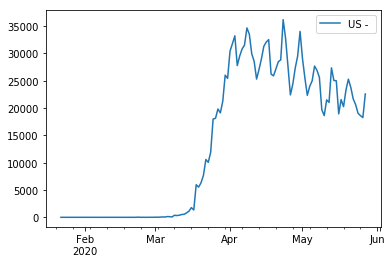

In [81]:
differential.plot()
plt.show()

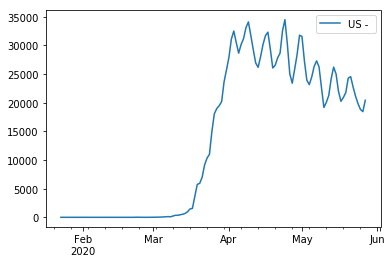

In [82]:
rolling_two_day = differential.rolling(2).mean()
rolling_two_day.plot()
plt.show()

In [83]:
five_day = differential.rolling(5).mean()

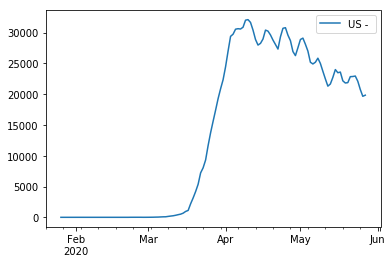

In [84]:
five_day.plot()
plt.show()

In [85]:
weekly_differenced = pd.DataFrame(differential.iloc[:-7])

for i in range(7, differential.shape[0]):
    weekly_differenced.iloc[i-7] = differential.iloc[i] - differential.iloc[i-7]

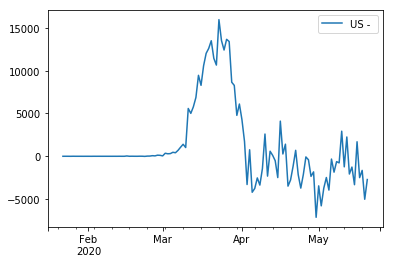

In [86]:
weekly_differenced.plot()
plt.show()

In [87]:
meta_difference = pd.DataFrame(differential.iloc[:-1])

for i in range(1, differential.shape[0]):
    meta_difference.iloc[i-1] = differential.iloc[i] - differential.iloc[i-1]

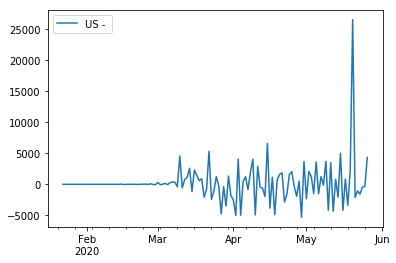

In [88]:
meta_difference.plot()
plt.show()

In [89]:
true_weekly_differenced = pd.DataFrame(data.iloc[:-7])

for i in range(7, data.shape[0]):
    true_weekly_differenced.iloc[i-7] = data.iloc[i] - data.iloc[i-7]

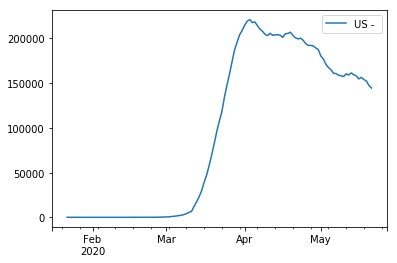

In [90]:
true_weekly_differenced.plot()
plt.show()

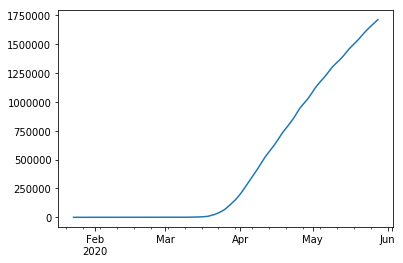

In [91]:
data.rolling(2, win_type='triang').mean().plot()
plt.show()

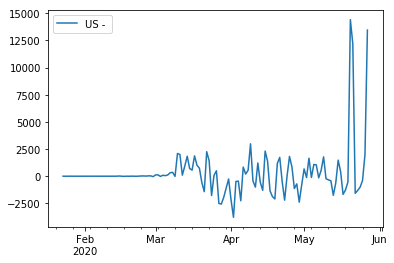

In [92]:
differential.rolling(2, win_type='triang').mean().plot()

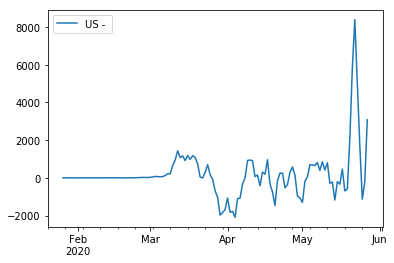

In [93]:
differential.rolling(5, win_type='triang').mean().plot()

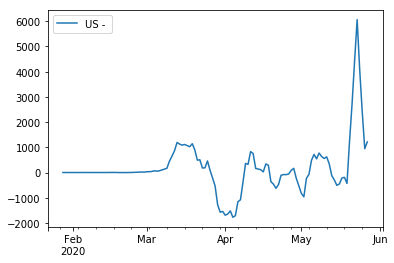

In [94]:
differential.rolling(7, win_type='triang').mean().plot()

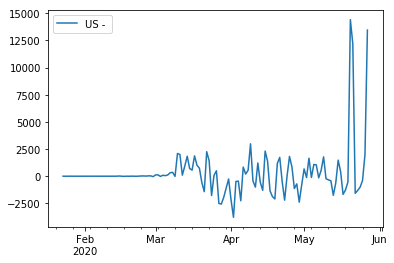

In [95]:
differential.rolling(2, win_type='gaussian').mean(std=100.1).plot()

In [96]:
summary.transpose()

count    1.280000e+02
mean     4.728101e+05
std      5.886941e+05
min      1.000000e+00
25%      1.500000e+01
50%      7.484000e+04
75%      9.713880e+05
max      1.721753e+06
Name: US - , dtype: float64

In [97]:
summary.index

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [98]:
summary.std

<bound method Series.std of count    1.280000e+02
mean     4.728101e+05
std      5.886941e+05
min      1.000000e+00
25%      1.500000e+01
50%      7.484000e+04
75%      9.713880e+05
max      1.721753e+06
Name: US - , dtype: float64>

In [99]:
summary['std']

588694.0788811289

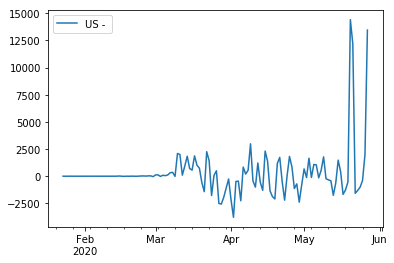

In [100]:
differential.rolling(2, win_type='gaussian').mean(std=summary['std']).plot()

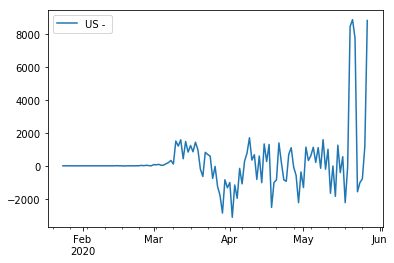

In [101]:
differential.rolling(3, win_type='gaussian').mean(std=summary['std']).plot()

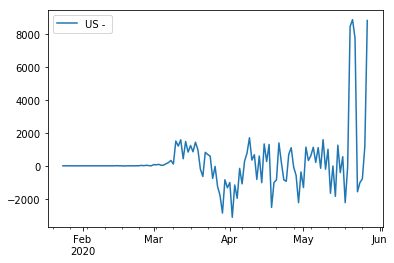

In [102]:
differential.rolling(3, win_type='gaussian').mean(std=summary['std']).plot()

In [103]:
differential.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 127 entries, 2020-01-22 to 2020-05-27
Data columns (total 1 columns):
US -     127 non-null int64
dtypes: int64(1)
memory usage: 2.0 KB


In [104]:
diff_summary = differential.describe().transpose()

In [105]:
diff_summary

,count,mean,std,min,25%,50%,75%,max
US -,127.0,355.543307,3767.484767,-5308.0,-601.0,0.0,872.0,26507.0


In [106]:
summary.transpose()

count    1.280000e+02
mean     4.728101e+05
std      5.886941e+05
min      1.000000e+00
25%      1.500000e+01
50%      7.484000e+04
75%      9.713880e+05
max      1.721753e+06
Name: US - , dtype: float64

In [107]:
summary.transpose()

count    1.280000e+02
mean     4.728101e+05
std      5.886941e+05
min      1.000000e+00
25%      1.500000e+01
50%      7.484000e+04
75%      9.713880e+05
max      1.721753e+06
Name: US - , dtype: float64

In [108]:
summary

count    1.280000e+02
mean     4.728101e+05
std      5.886941e+05
min      1.000000e+00
25%      1.500000e+01
50%      7.484000e+04
75%      9.713880e+05
max      1.721753e+06
Name: US - , dtype: float64

In [109]:
data.describe().transpose()

count    1.280000e+02
mean     4.728101e+05
std      5.886941e+05
min      1.000000e+00
25%      1.500000e+01
50%      7.484000e+04
75%      9.713880e+05
max      1.721753e+06
Name: US - , dtype: float64

In [110]:
type(diff_summary)

pandas.core.frame.DataFrame

In [111]:
type(summary)

pandas.core.series.Series

In [112]:
summary = pd.DataFrame(summary)

In [113]:
summary.transpose()

,count,mean,std,min,25%,50%,75%,max
US -,128.0,472810.125,588694.078881,1.0,15.0,74840.0,971388.0,1721753.0


In [114]:
diff_summary['std']+2

US -     3769.484767
Name: std, dtype: float64

In [115]:
diff_summary['std'][0]

3767.484767363494

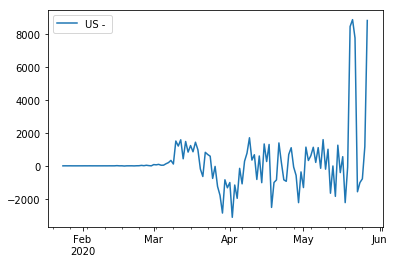

In [117]:
differential.rolling(3, win_type='gaussian').mean(std=diff_summary['std'][0]).plot()

In [118]:
type(diff_summary)

pandas.core.frame.DataFrame

In [119]:
type(diff_summary['std'])

pandas.core.series.Series

In [120]:
diff_summary.std

<bound method DataFrame.std of        count        mean          std     min    25%  50%    75%      max
US -   127.0  355.543307  3767.484767 -5308.0 -601.0  0.0  872.0  26507.0>

In [123]:
diff_summary.columns

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [122]:
diff_summary['std'].values

array([3767.48476736])

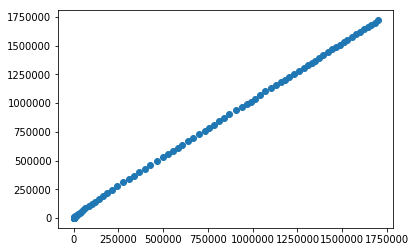

In [144]:
x = data.iloc[:-1]
y = data.iloc[1:]

plt.scatter(x,y)

In [145]:
model = np.polyfit(x,y,1)

In [146]:
model

array([1.01561397e+00, 6.32821205e+03])

In [147]:
predict = np.poly1d(model)
confirmed_test_case = 100
predict(confirmed_test_case)

6429.773445610215

In [148]:
from sklearn.metrics import r2_score
r2_score(y, predict(x))

0.9997456340103636

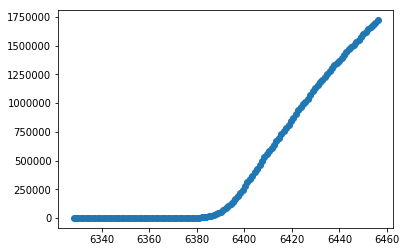

In [149]:
x_lin_reg = range(0,127)
y_lin_reg = predict(x_lin_reg)
plt.scatter(y_lin_reg,y)


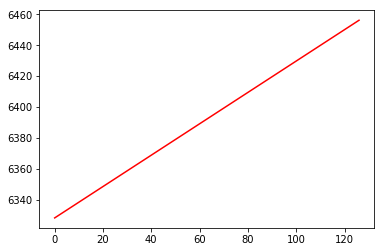

In [150]:
plt.plot(x_lin_reg, y_lin_reg, c = 'r')

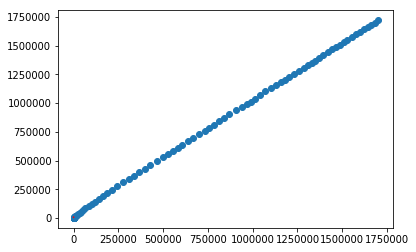

In [151]:
plt.scatter(x,y)
plt.plot(x_lin_reg, y_lin_reg, c = 'r')

In [152]:
differential.head()

,US -
2020-01-22,0
2020-01-23,1
2020-01-24,0
2020-01-25,3
2020-01-26,0


In [153]:
type(data[:-1])

pandas.core.series.Series

In [154]:
type(differential["US - "])
diff_series = differential["US - "]

In [155]:
differenced_model = np.polyfit(data[:-1], diff_series, 1)

In [156]:
differenced_model

array([1.56139658e-02, 6.32821205e+03])

In [157]:
model

array([1.01561397e+00, 6.32821205e+03])

In [158]:
diff_predict = np.poly1d(differenced_model)

In [159]:
diff_predict(confirmed_test_case)

6329.77344561013

In [160]:
predict(confirmed_test_case)

6429.773445610215

In [161]:
diff_predict(200)

6331.334842187852

In [162]:
predict(200)

6531.334842187937

In [163]:
y_pred = diff_predict(data[:-1])

In [164]:
r2_score(diff_series, y_pred)

0.4815874136975462

In [165]:
change_model = np.polyfit(diff_series[:-1], diff_series[1:],1)
change_predict = np.poly1d(change_model)
y_pred_change = change_predict(diff_series[:-1])

In [166]:
r2_score(diff_series[1:], y_pred_change)

0.9696316809215968

In [167]:
change_model

array([  0.98232079, 417.59577772])

[]

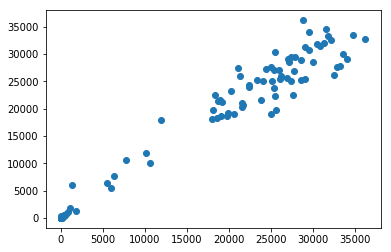

In [168]:
plt.scatter(diff_series[:-1], diff_series[1:])
plt.plot()

In [169]:
diff_series.head(10)

2020-01-22    0
2020-01-23    1
2020-01-24    0
2020-01-25    3
2020-01-26    0
2020-01-27    0
2020-01-28    0
2020-01-29    0
2020-01-30    2
2020-01-31    1
Name: US - , dtype: int64

In [170]:
differential.head(10)

,US -
2020-01-22,0
2020-01-23,1
2020-01-24,0
2020-01-25,3
2020-01-26,0
2020-01-27,0
2020-01-28,0
2020-01-29,0
2020-01-30,2
2020-01-31,1


[]

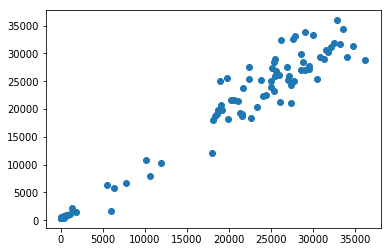

In [171]:
plt.scatter(diff_series[1:], y_pred_change)
plt.plot()

In [172]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_change = sqrt(mean_squared_error(diff_series[1:], y_pred_change))

In [173]:
rmse_change

2265.7577538657247

In [174]:
rmse_persistence = sqrt(mean_squared_error(diff_series[:-1], diff_series[1:]))

In [175]:
rmse_persistence

2284.4817636767048

In [176]:
data.head()

2020-01-22    1
2020-01-23    1
2020-01-24    2
2020-01-25    2
2020-01-26    5
Name: US - , dtype: int64

In [177]:
plain_df.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20
Country - State,,,,,,,,,,,,,,,,,,,,,
Afghanistan -,0,0,0,0,0,0,0,0,0,0,...,7653,8145,8676,9216,9998,10582,11173,11831,12456,13036
Albania -,0,0,0,0,0,0,0,0,0,0,...,949,964,969,981,989,998,1004,1029,1050,1076
Algeria -,0,0,0,0,0,0,0,0,0,0,...,7377,7542,7728,7918,8113,8306,8503,8697,8857,8997
Andorra -,0,0,0,0,0,0,0,0,0,0,...,761,762,762,762,762,762,763,763,763,763
Angola -,0,0,0,0,0,0,0,0,0,0,...,52,52,58,60,61,69,70,70,71,74


In [178]:
plain_df.transpose().head()

Country - State,Afghanistan -,Albania -,Algeria -,Andorra -,Angola -,Antigua and Barbuda -,Argentina -,Armenia -,Australia - Australian Capital Territory,Australia - New South Wales,...,Malawi -,United Kingdom - Falkland Islands (Malvinas),France - Saint Pierre and Miquelon,South Sudan -,Western Sahara -,Sao Tome and Principe -,Yemen -,Comoros -,Tajikistan -,Lesotho -
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0


In [179]:
plain_df.index

CategoricalIndex(['Afghanistan - ', 'Albania - ', 'Algeria - ', 'Andorra - ',
                  'Angola - ', 'Antigua and Barbuda - ', 'Argentina - ',
                  'Armenia - ', 'Australia - Australian Capital Territory',
                  'Australia - New South Wales',
                  ...
                  'Malawi - ', 'United Kingdom - Falkland Islands (Malvinas)',
                  'France - Saint Pierre and Miquelon', 'South Sudan - ',
                  'Western Sahara - ', 'Sao Tome and Principe - ', 'Yemen - ',
                  'Comoros - ', 'Tajikistan - ', 'Lesotho - '],
                 categories=['Afghanistan - ', 'Albania - ', 'Algeria - ', 'Andorra - ', 'Angola - ', 'Antigua and Barbuda - ', 'Argentina - ', 'Armenia - ', ...], ordered=False, name='Country - State', dtype='category', length=266)

In [180]:
plain_df.reset_index()

,Country - State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20
0,Afghanistan -,0,0,0,0,0,0,0,0,0,...,7653,8145,8676,9216,9998,10582,11173,11831,12456,13036
1,Albania -,0,0,0,0,0,0,0,0,0,...,949,964,969,981,989,998,1004,1029,1050,1076
2,Algeria -,0,0,0,0,0,0,0,0,0,...,7377,7542,7728,7918,8113,8306,8503,8697,8857,8997
3,Andorra -,0,0,0,0,0,0,0,0,0,...,761,762,762,762,762,762,763,763,763,763
4,Angola -,0,0,0,0,0,0,0,0,0,...,52,52,58,60,61,69,70,70,71,74
5,Antigua and Barbuda -,0,0,0,0,0,0,0,0,0,...,25,25,25,25,25,25,25,25,25,25
6,Argentina -,0,0,0,0,0,0,0,0,0,...,8809,9283,9931,10649,11353,12076,12628,13228,13933,14702
7,Armenia -,0,0,0,0,0,0,0,0,0,...,5041,5271,5606,5928,6302,6661,7113,7402,7774,8216
8,Australia - Australian Capital Territory,0,0,0,0,0,0,0,0,0,...,107,107,107,107,107,107,107,107,107,107
9,Australia - New South Wales,0,0,0,0,3,4,4,4,4,...,3081,3082,3084,3086,3087,3090,3092,3089,3090,3092


In [181]:
test_df = plain_df.transpose()

In [182]:
test_df.head()

Country - State,Afghanistan -,Albania -,Algeria -,Andorra -,Angola -,Antigua and Barbuda -,Argentina -,Armenia -,Australia - Australian Capital Territory,Australia - New South Wales,...,Malawi -,United Kingdom - Falkland Islands (Malvinas),France - Saint Pierre and Miquelon,South Sudan -,Western Sahara -,Sao Tome and Principe -,Yemen -,Comoros -,Tajikistan -,Lesotho -
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0


In [183]:
test_df.index

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '5/19/20', '5/20/20', '5/21/20', '5/22/20', '5/23/20', '5/24/20',
       '5/25/20', '5/26/20', '5/27/20', '5/28/20'],
      dtype='object', length=128)

In [184]:
test_df['Afghanistan - '].values

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     4,     4,     5,     7,     7,     7,    11,    16,
          21,    22,    22,    22,    24,    24,    40,    40,    74,
          84,    94,   110,   110,   120,   170,   174,   237,   273,
         281,   299,   349,   367,   423,   444,   484,   521,   555,
         607,   665,   714,   784,   840,   906,   933,   996,  1026,
        1092,  1176,  1279,  1351,  1463,  1531,  1703,  1828,  1939,
        2171,  2335,  2469,  2704,  2894,  3224,  3392,  3563,  3778,
        4033,  4402,  4687,  4963,  5226,  5639,  6053,  6402,  6664,
        7072,  7653,  8145,  8676,  9216,  9998, 10582, 11173, 11831,
       12456, 13036]

In [186]:
for i in test_df.columns:
    print(test_df[i].head())

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
1/26/20    0
Name: Afghanistan - , dtype: int64
1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
1/26/20    0
Name: Albania - , dtype: int64
1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
1/26/20    0
Name: Algeria - , dtype: int64
1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
1/26/20    0
Name: Andorra - , dtype: int64
1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
1/26/20    0
Name: Angola - , dtype: int64
1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
1/26/20    0
Name: Antigua and Barbuda - , dtype: int64
1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
1/26/20    0
Name: Argentina - , dtype: int64
1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
1/26/20    0
Name: Armenia - , dtype: int64
1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
1/26/20    0
Name: Australia - Australian Capital Territory, dtype: int64
1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
1/26/20    3
Name: Australia - New So

Name: Kazakhstan - , dtype: int64
1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
1/26/20    0
Name: Kenya - , dtype: int64
1/22/20    1
1/23/20    1
1/24/20    2
1/25/20    2
1/26/20    3
Name: Korea, South - , dtype: int64
1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
1/26/20    0
Name: Kuwait - , dtype: int64
1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
1/26/20    0
Name: Kyrgyzstan - , dtype: int64
1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
1/26/20    0
Name: Latvia - , dtype: int64
1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
1/26/20    0
Name: Lebanon - , dtype: int64
1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
1/26/20    0
Name: Liberia - , dtype: int64
1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
1/26/20    0
Name: Liechtenstein - , dtype: int64
1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
1/26/20    0
Name: Lithuania - , dtype: int64
1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
1/26/20    0
Name: Luxembourg - , dtyp

In [187]:
test_df.index

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '5/19/20', '5/20/20', '5/21/20', '5/22/20', '5/23/20', '5/24/20',
       '5/25/20', '5/26/20', '5/27/20', '5/28/20'],
      dtype='object', length=128)

In [188]:
test_df.index = pd.to_datetime(test_df.index)

In [189]:
test_df.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2020-05-19', '2020-05-20', '2020-05-21', '2020-05-22',
               '2020-05-23', '2020-05-24', '2020-05-25', '2020-05-26',
               '2020-05-27', '2020-05-28'],
              dtype='datetime64[ns]', length=128, freq=None)

In [190]:
index = test_df.index

In [191]:
stacked_df = pd.DataFrame()

for i in test_df.columns:
    temp_df = pd.DataFrame(test_df[i].values, columns = ["Confirmed_Cases"])
    temp_df['Country'] = i
    temp_df.index = index
    stacked_df = stacked_df.append(temp_df, ignore_index=False)

In [192]:
stacked_df

,Confirmed_Cases,Country
2020-01-22,0,Afghanistan -
2020-01-23,0,Afghanistan -
2020-01-24,0,Afghanistan -
2020-01-25,0,Afghanistan -
2020-01-26,0,Afghanistan -
2020-01-27,0,Afghanistan -
2020-01-28,0,Afghanistan -
2020-01-29,0,Afghanistan -
2020-01-30,0,Afghanistan -
2020-01-31,0,Afghanistan -


In [193]:
stacked_df.iloc[0:5]

,Confirmed_Cases,Country
2020-01-22,0,Afghanistan -
2020-01-23,0,Afghanistan -
2020-01-24,0,Afghanistan -
2020-01-25,0,Afghanistan -
2020-01-26,0,Afghanistan -


In [194]:
stacked_df.iloc[128:133]

,Confirmed_Cases,Country
2020-01-22,0,Albania -
2020-01-23,0,Albania -
2020-01-24,0,Albania -
2020-01-25,0,Albania -
2020-01-26,0,Albania -


In [195]:
stacked_df[stacked_df['Country'] == 'Albania - ']

,Confirmed_Cases,Country
2020-01-22,0,Albania -
2020-01-23,0,Albania -
2020-01-24,0,Albania -
2020-01-25,0,Albania -
2020-01-26,0,Albania -
2020-01-27,0,Albania -
2020-01-28,0,Albania -
2020-01-29,0,Albania -
2020-01-30,0,Albania -
2020-01-31,0,Albania -


In [196]:
alb = stacked_df[stacked_df['Country'] == 'Albania - ']
alb['Confirmed_Cases'].diff()

2020-01-22     NaN
2020-01-23     0.0
2020-01-24     0.0
2020-01-25     0.0
2020-01-26     0.0
2020-01-27     0.0
2020-01-28     0.0
2020-01-29     0.0
2020-01-30     0.0
2020-01-31     0.0
2020-02-01     0.0
2020-02-02     0.0
2020-02-03     0.0
2020-02-04     0.0
2020-02-05     0.0
2020-02-06     0.0
2020-02-07     0.0
2020-02-08     0.0
2020-02-09     0.0
2020-02-10     0.0
2020-02-11     0.0
2020-02-12     0.0
2020-02-13     0.0
2020-02-14     0.0
2020-02-15     0.0
2020-02-16     0.0
2020-02-17     0.0
2020-02-18     0.0
2020-02-19     0.0
2020-02-20     0.0
              ... 
2020-04-29    16.0
2020-04-30     7.0
2020-05-01     9.0
2020-05-02     7.0
2020-05-03     6.0
2020-05-04     8.0
2020-05-05    17.0
2020-05-06    12.0
2020-05-07    10.0
2020-05-08     8.0
2020-05-09     6.0
2020-05-10    12.0
2020-05-11     4.0
2020-05-12     4.0
2020-05-13     4.0
2020-05-14    18.0
2020-05-15    18.0
2020-05-16    17.0
2020-05-17    13.0
2020-05-18     2.0
2020-05-19     1.0
2020-05-20  

In [197]:
new_df = test_df
for i in test_df.columns:
    new_df[i] = new_df[i].diff()

In [198]:
new_df.dropna(inplace=True)

In [199]:
new_df

Country - State,Afghanistan -,Albania -,Algeria -,Andorra -,Angola -,Antigua and Barbuda -,Argentina -,Armenia -,Australia - Australian Capital Territory,Australia - New South Wales,...,Malawi -,United Kingdom - Falkland Islands (Malvinas),France - Saint Pierre and Miquelon,South Sudan -,Western Sahara -,Sao Tome and Principe -,Yemen -,Comoros -,Tajikistan -,Lesotho -
2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [200]:
index = new_df.index

In [201]:
final_clean_df = pd.DataFrame()

for i in test_df.columns:
    temp_df = pd.DataFrame(new_df[i].values, columns = ['Confirmed_Cases'])
    temp_df['Country'] = i
    temp_df.index = index
    final_clean_df = final_clean_df.append(temp_df, ignore_index=False)

In [202]:
final_clean_df

,Confirmed_Cases,Country
2020-01-23,0.0,Afghanistan -
2020-01-24,0.0,Afghanistan -
2020-01-25,0.0,Afghanistan -
2020-01-26,0.0,Afghanistan -
2020-01-27,0.0,Afghanistan -
2020-01-28,0.0,Afghanistan -
2020-01-29,0.0,Afghanistan -
2020-01-30,0.0,Afghanistan -
2020-01-31,0.0,Afghanistan -
2020-02-01,0.0,Afghanistan -


In [203]:
index

DatetimeIndex(['2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26',
               '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30',
               '2020-01-31', '2020-02-01',
               ...
               '2020-05-19', '2020-05-20', '2020-05-21', '2020-05-22',
               '2020-05-23', '2020-05-24', '2020-05-25', '2020-05-26',
               '2020-05-27', '2020-05-28'],
              dtype='datetime64[ns]', length=127, freq=None)

In [204]:
final_clean_df

,Confirmed_Cases,Country
2020-01-23,0.0,Afghanistan -
2020-01-24,0.0,Afghanistan -
2020-01-25,0.0,Afghanistan -
2020-01-26,0.0,Afghanistan -
2020-01-27,0.0,Afghanistan -
2020-01-28,0.0,Afghanistan -
2020-01-29,0.0,Afghanistan -
2020-01-30,0.0,Afghanistan -
2020-01-31,0.0,Afghanistan -
2020-02-01,0.0,Afghanistan -


In [205]:
final_clean_df.describe()

,Confirmed_Cases
count,33782.000000
mean,171.937452
std,1353.983287
min,-10034.000000
25%,0.000000
50%,0.000000
75%,10.000000
max,36188.000000


In [206]:
final_clean_df.loc[final_clean_df['Confirmed_Cases'] == -10034]

,Confirmed_Cases,Country
2020-04-24,-10034.0,Spain -


In [207]:
test_df['Spain - ']

2020-01-23       0.0
2020-01-24       0.0
2020-01-25       0.0
2020-01-26       0.0
2020-01-27       0.0
2020-01-28       0.0
2020-01-29       0.0
2020-01-30       0.0
2020-01-31       0.0
2020-02-01       1.0
2020-02-02       0.0
2020-02-03       0.0
2020-02-04       0.0
2020-02-05       0.0
2020-02-06       0.0
2020-02-07       0.0
2020-02-08       0.0
2020-02-09       1.0
2020-02-10       0.0
2020-02-11       0.0
2020-02-12       0.0
2020-02-13       0.0
2020-02-14       0.0
2020-02-15       0.0
2020-02-16       0.0
2020-02-17       0.0
2020-02-18       0.0
2020-02-19       0.0
2020-02-20       0.0
2020-02-21       0.0
               ...  
2020-04-29    2144.0
2020-04-30     518.0
2020-05-01    1781.0
2020-05-02    1366.0
2020-05-03     884.0
2020-05-04     545.0
2020-05-05    1318.0
2020-05-06     996.0
2020-05-07    1122.0
2020-05-08    1410.0
2020-05-09     721.0
2020-05-10     772.0
2020-05-11    3086.0
2020-05-12     594.0
2020-05-13     661.0
2020-05-14     849.0
2020-05-15   

In [208]:
confirmed_data.loc['Spain - '].iloc[:-1].diff()

1/22/20       NaN
1/23/20       0.0
1/24/20       0.0
1/25/20       0.0
1/26/20       0.0
1/27/20       0.0
1/28/20       0.0
1/29/20       0.0
1/30/20       0.0
1/31/20       0.0
2/1/20        1.0
2/2/20        0.0
2/3/20        0.0
2/4/20        0.0
2/5/20        0.0
2/6/20        0.0
2/7/20        0.0
2/8/20        0.0
2/9/20        1.0
2/10/20       0.0
2/11/20       0.0
2/12/20       0.0
2/13/20       0.0
2/14/20       0.0
2/15/20       0.0
2/16/20       0.0
2/17/20       0.0
2/18/20       0.0
2/19/20       0.0
2/20/20       0.0
            ...  
4/29/20    2144.0
4/30/20     518.0
5/1/20     1781.0
5/2/20     1366.0
5/3/20      884.0
5/4/20      545.0
5/5/20     1318.0
5/6/20      996.0
5/7/20     1122.0
5/8/20     1410.0
5/9/20      721.0
5/10/20     772.0
5/11/20    3086.0
5/12/20     594.0
5/13/20     661.0
5/14/20     849.0
5/15/20     643.0
5/16/20     515.0
5/17/20       0.0
5/18/20     908.0
5/19/20     431.0
5/20/20     518.0
5/21/20     482.0
5/22/20    1787.0
5/23/20   

In [209]:
confirmed_data.loc['Spain - '].iloc[:-1].diff().describe()

count      127.000000
mean      1873.275591
std       2799.001045
min     -10034.000000
25%          0.000000
50%        643.000000
75%       3177.000000
max       9630.000000
Name: Spain - , dtype: float64

In [210]:
confirmed_data.loc['Spain - ']

1/22/20          0.000000
1/23/20          0.000000
1/24/20          0.000000
1/25/20          0.000000
1/26/20          0.000000
1/27/20          0.000000
1/28/20          0.000000
1/29/20          0.000000
1/30/20          0.000000
1/31/20          0.000000
2/1/20           1.000000
2/2/20           1.000000
2/3/20           1.000000
2/4/20           1.000000
2/5/20           1.000000
2/6/20           1.000000
2/7/20           1.000000
2/8/20           1.000000
2/9/20           2.000000
2/10/20          2.000000
2/11/20          2.000000
2/12/20          2.000000
2/13/20          2.000000
2/14/20          2.000000
2/15/20          2.000000
2/16/20          2.000000
2/17/20          2.000000
2/18/20          2.000000
2/19/20          2.000000
2/20/20          2.000000
                ...      
4/30/20     213435.000000
5/1/20      215216.000000
5/2/20      216582.000000
5/3/20      217466.000000
5/4/20      218011.000000
5/5/20      219329.000000
5/6/20      220325.000000
5/7/20      

In [205]:
#It appears I have bad data from Spain, either that or I am misunderstanding the data.  After using pandas.diff() function,
# I am actually getting a negative number from 5/24 to 5/25 as the total goes from 235,772 confirmed cases on 5/24,
# TO 235,400 cases on 5/25.  I might want to consider discarding Spain from the dataset.
# There is also a negative number from 4/24 to 4/25
# To be sure, I compared it to the original dataset I imported to ensure I didn't alter the data during my investigation.


In [211]:
final_clean_df.loc[final_clean_df['Confirmed_Cases'] < 0]

,Confirmed_Cases,Country
2020-04-13,-1.0,Australia - Australian Capital Territory
2020-05-03,-2.0,Australia - New South Wales
2020-05-26,-3.0,Australia - New South Wales
2020-03-06,-1.0,Australia - Northern Territory
2020-05-01,-1.0,Australia - Northern Territory
2020-01-31,-1.0,Australia - Queensland
2020-02-02,-1.0,Australia - Queensland
2020-04-29,-1.0,Australia - Queensland
2020-05-13,-1.0,Australia - Queensland
2020-05-24,-5.0,Australia - Queensland


In [212]:
negative_differences = final_clean_df.loc[final_clean_df['Confirmed_Cases'] < 0]

In [213]:
negative_differences.shape

(54, 2)

In [214]:
negative_differences.Country.unique()

array(['Australia - Australian Capital Territory',
       'Australia - New South Wales', 'Australia - Northern Territory',
       'Australia - Queensland', 'Australia - Western Australia',
       'Benin - ', 'Canada - Alberta', 'Canada - Manitoba',
       'Canada - Newfoundland and Labrador', 'Canada - Ontario',
       'China - Guizhou', 'Ecuador - ', 'France - New Caledonia',
       'France - Reunion', 'France - Saint Barthelemy', 'France - ',
       'Guyana - ', 'Honduras - ', 'Japan - ', 'Lithuania - ',
       'Madagascar - ', 'Mauritius - ', 'Nepal - ', 'New Zealand - ',
       'Portugal - ', 'San Marino - ', 'Spain - ', 'Uganda - ',
       'United Kingdom - Gibraltar', 'United Kingdom - ', 'Uruguay - ',
       'Zimbabwe - ', 'United Kingdom - Turks and Caicos Islands'],
      dtype=object)

In [210]:
len(negative_differences.Country.unique())

33

In [211]:
# So I have 33 countries that actually show bad values if we think the dataset shows the number of total confirmed cases,
# It may be the case that it actually represents the number of ACTIVE cases.

In [215]:
df = final_clean_df

In [216]:
df[df['Country'] == 'US - ']

,Confirmed_Cases,Country
2020-01-23,0.0,US -
2020-01-24,1.0,US -
2020-01-25,0.0,US -
2020-01-26,3.0,US -
2020-01-27,0.0,US -
2020-01-28,0.0,US -
2020-01-29,0.0,US -
2020-01-30,0.0,US -
2020-01-31,2.0,US -
2020-02-01,1.0,US -


In [217]:
us = df[df['Country'] == 'US - ']

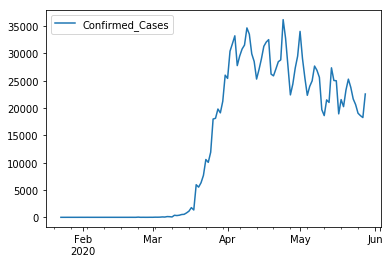

In [218]:
us.plot()

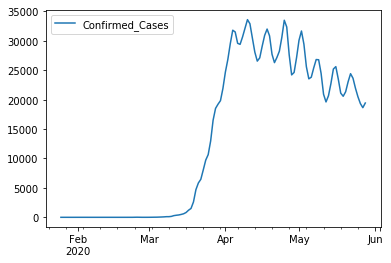

In [219]:
us.rolling(window=3, win_type='triang').mean().plot()

In [220]:
us_without_last_day = us.drop('2020-05-28')
us_without_last_day.tail()

KeyError: "['2020-05-28'] not found in axis"

In [221]:
us.index

DatetimeIndex(['2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26',
               '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30',
               '2020-01-31', '2020-02-01',
               ...
               '2020-05-19', '2020-05-20', '2020-05-21', '2020-05-22',
               '2020-05-23', '2020-05-24', '2020-05-25', '2020-05-26',
               '2020-05-27', '2020-05-28'],
              dtype='datetime64[ns]', length=127, freq=None)

In [222]:
us_without_last_day = us.drop(us.index[-1])

In [223]:
us_without_last_day.tail()

,Confirmed_Cases,Country
2020-05-23,21675.0,US -
2020-05-24,20634.0,US -
2020-05-25,19056.0,US -
2020-05-26,18611.0,US -
2020-05-27,18263.0,US -


In [224]:
us_without_first_day = us.drop(us.index[0])
us_without_first_day.head()

,Confirmed_Cases,Country
2020-01-24,1.0,US -
2020-01-25,0.0,US -
2020-01-26,3.0,US -
2020-01-27,0.0,US -
2020-01-28,0.0,US -


In [225]:
us_x = us_without_last_day
us_y = us_without_first_day